# Project: Investigate 'No Show Appointments' Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> I have selected "No Show Appointments Dataset". This dataset has 110,527 medical appointments and 14 attributes, among them one is the target variable "No-Show".

### List of the attributes with their consisting values:

- PatientId (Identification of a patient)

- AppointmentID (Identification of each appointment)

- Gender (Male or Female)

- ScheduledDay (The day of the actuall appointment, when they have to visit the doctor.)

- AppointmentDay (The day someone called or registered the appointment, this is before appointment of course.)

- Age (How old is the patient.)

- Neighbourhood (Where the appointment takes place.)

- Scholarship (True of False.)

- Hypertension (True or False)

- Diabetes (True or False)

- Alcoholism (True or False)

- Handicap (True or False)

- SMS_received (1 or more messages sent to the patient.)

- No-show (True or False.)



### Questions:

- Is there any relationship between 'Gender' and 'Not showing up at appointment'?

- Does a neighbiurhood have more tendency to show up or not show up at an appointment?

- People of which age range misses the appointment most?

- Who recieved sms and didn't show up?
 
- What is the relation between age and also other binary features?

In [61]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

%matplotlib inline
%config InlineBackend.figure_format='retina'

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [62]:
dataset = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
dataset.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


#### Fixing column names

There are some issues with the consistency of the column names. It needs to be fixed.

In [63]:
dataset.rename(columns={"Hipertension": "Hypertension", "Handcap": "Handicap", "No-show": "NoShow", "SMS_received": "SmsReceived"}, inplace=True)
dataset.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SmsReceived,NoShow
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


#### "NoShow" column is very confusing. Here "Yes" means patient didn't show up and "No" means showed up. We are changing it to "ShowedUp" where "Yes" and "No" meaning is straight forward.

In [64]:
dataset.rename(columns={"NoShow": "ShowedUp"}, inplace=True)
dataset["ShowedUp"] = dataset["ShowedUp"].map({"No": "Yes", "Yes": "No"})
dataset.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SmsReceived,ShowedUp
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,Yes
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,Yes
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,Yes
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,Yes
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,Yes


In [65]:
print("Number of Patient Data Points: {}".format(dataset.shape[0]))
print("Number of Attributes: {}".format(dataset.shape[1]))

Number of Patient Data Points: 110527
Number of Attributes: 14


In [66]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hypertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handicap        110527 non-null  int64  
 12  SmsReceived     110527 non-null  int64  
 13  ShowedUp        110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


#### We can notice that "ScheduledDay" and "AppointmentDay" columns data types are object. Though they consists of datetime. For our convininet we are going to change the datatypes.

In [67]:
dataset['ScheduledDay'] = pd.to_datetime(dataset['ScheduledDay'])
dataset['AppointmentDay'] = pd.to_datetime(dataset['AppointmentDay'])
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110527 non-null  float64            
 1   AppointmentID   110527 non-null  int64              
 2   Gender          110527 non-null  object             
 3   ScheduledDay    110527 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110527 non-null  datetime64[ns, UTC]
 5   Age             110527 non-null  int64              
 6   Neighbourhood   110527 non-null  object             
 7   Scholarship     110527 non-null  int64              
 8   Hypertension    110527 non-null  int64              
 9   Diabetes        110527 non-null  int64              
 10  Alcoholism      110527 non-null  int64              
 11  Handicap        110527 non-null  int64              
 12  SmsReceived     110527 non-null  int64              
 13  ShowedUp      

In [68]:
dataset.isna().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hypertension      0
Diabetes          0
Alcoholism        0
Handicap          0
SmsReceived       0
ShowedUp          0
dtype: int64

In [69]:
dataset.AppointmentID.nunique()

110527

>So, we don't have any duplicate applicants.

In [70]:
dataset.Gender.unique()

array(['F', 'M'], dtype=object)

In [71]:
dataset.ShowedUp.unique()

array(['Yes', 'No'], dtype=object)

In [72]:
print("Number of Unique Neighbourhood: {}".format(dataset.Neighbourhood.nunique()))

Number of Unique Neighbourhood: 81


> We can see that the data is quite clean. No Null or Nan values in the dataset. So, nothing to clean.

### Data Cleaning

#### Let's check the Age column

In [73]:
print("Minimum Age: {}".format(dataset.Age.min()))
print("Maximum Age: {}".format(dataset.Age.max()))

Minimum Age: -1
Maximum Age: 115


In [74]:
print("Number of patients with negative age: {}".format(dataset[dataset['Age'] < 0].shape[0]))

Number of patients with negative age: 1


> There is a negative age in the dataset. We Need to remove this from the dataset.

In [75]:
dataset = dataset[dataset.Age >= 0] 
dataset.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SmsReceived,ShowedUp
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,Yes
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,Yes
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,Yes
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,Yes
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,Yes


In [76]:
print("Total Patients: {}".format(dataset.shape[0]))

print("Numberof patients history where ScheduledDay is greater than AppointmentDay: {}".format(dataset[dataset["ScheduledDay"] > dataset["AppointmentDay"]].shape[0]))

print("Numberof patients history where AppointmentDay is greater than ScheduledDay: {}".format(dataset[dataset["ScheduledDay"] < dataset["AppointmentDay"]].shape[0]))

Total Patients: 110526
Numberof patients history where ScheduledDay is greater than AppointmentDay: 38567
Numberof patients history where AppointmentDay is greater than ScheduledDay: 71959


> According to this findings there are many cases where appointments were made after scheduledday. So will skip this two features for our analysis.

<a id='eda'></a>
## Exploratory Data Analysis

### Let us first see how many examaples do we have for both classes.(Showed up and not showed up)

In [77]:
print("Normalized:")
print(dataset.ShowedUp.value_counts(normalize=True))

print("Counts:")
print(dataset.ShowedUp.value_counts())

Normalized:
Yes    0.798066
No     0.201934
Name: ShowedUp, dtype: float64
Counts:
Yes    88207
No     22319
Name: ShowedUp, dtype: int64


### Is there any relationship between 'Gender' and 'Not showing up at appointment'?

In [78]:
dataset.groupby("Gender")["ShowedUp"].value_counts()

Gender  ShowedUp
F       Yes         57245
        No          14594
M       Yes         30962
        No           7725
Name: ShowedUp, dtype: int64

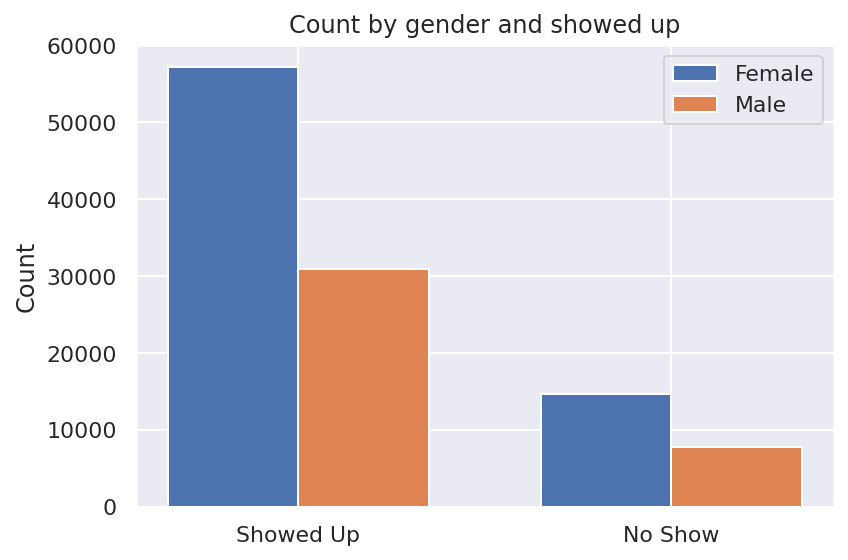

In [79]:
labels = ["Showed Up", "No Show"]
female_showed_up = dataset[(dataset['Gender'] == 'F') & (dataset['ShowedUp'] == "Yes")].shape[0]
female_no_show = dataset[(dataset['Gender'] == 'F') & (dataset['ShowedUp'] == "No")].shape[0]

male_showed_up = dataset[(dataset['Gender'] == 'M') & (dataset['ShowedUp'] == "Yes")].shape[0]
male_no_show = dataset[(dataset['Gender'] == 'M') & (dataset['ShowedUp'] == "No")].shape[0]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
ax.bar(x - width/2, [female_showed_up, female_no_show], width, label='Female')
ax.bar(x + width/2, [male_showed_up, male_no_show], width, label='Male')

ax.set_ylabel('Count')
ax.set_title('Count by gender and showed up')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()

plt.show()

> Females are more likely to not show up at the appointment.

#### Does a neighbiurhood have more tendency to show up or not show up at an appointment?

In [80]:
def get_top_neighbourhoods(top_n: int):
    top_patient_neighbourhoods = dataset["Neighbourhood"].value_counts()[:top_n]
    return dataset[dataset["Neighbourhood"].isin(top_patient_neighbourhoods.index)].groupby("Neighbourhood")["ShowedUp"].value_counts(normalize=True)  

In [81]:
get_top_neighbourhoods(top_n=10)

Neighbourhood      ShowedUp
BONFIM             Yes         0.801659
                   No          0.198341
CENTRO             Yes         0.789142
                   No          0.210858
ITARARÉ            Yes         0.737336
                   No          0.262664
JARDIM CAMBURI     Yes         0.810159
                   No          0.189841
JARDIM DA PENHA    Yes         0.837245
                   No          0.162755
JESUS DE NAZARETH  Yes         0.756046
                   No          0.243954
MARIA ORTIZ        Yes         0.790009
                   No          0.209991
RESISTÊNCIA        Yes         0.795531
                   No          0.204469
SANTA MARTHA       Yes         0.841584
                   No          0.158416
TABUAZEIRO         Yes         0.817050
                   No          0.182950
Name: ShowedUp, dtype: float64

In [82]:
def get_bottom_patient_neighbourhoods(bottom_n: int):
    number_of_neighbourhoods = dataset["Neighbourhood"].nunique()
    bottom_patient_neighbourhoods = dataset["Neighbourhood"].value_counts()[(number_of_neighbourhoods - bottom_n):]
    return dataset[dataset["Neighbourhood"].isin(bottom_patient_neighbourhoods.index)].groupby("Neighbourhood")["ShowedUp"].value_counts(normalize=True)

In [83]:
get_bottom_patient_neighbourhoods(bottom_n=10)

Neighbourhood                ShowedUp
AEROPORTO                    Yes         0.875000
                             No          0.125000
ILHA DO BOI                  Yes         0.914286
                             No          0.085714
ILHA DO FRADE                Yes         0.800000
                             No          0.200000
ILHAS OCEÂNICAS DE TRINDADE  No          1.000000
MORADA DE CAMBURI            Yes         0.833333
                             No          0.166667
NAZARETH                     Yes         0.785185
                             No          0.214815
PARQUE INDUSTRIAL            Yes         1.000000
PONTAL DE CAMBURI            Yes         0.826087
                             No          0.173913
SEGURANÇA DO LAR             Yes         0.806897
                             No          0.193103
UNIVERSITÁRIO                Yes         0.789474
                             No          0.210526
Name: ShowedUp, dtype: float64

> Looking at the ratios of showing up at the appointment of top 10 and bottom 10 neighborhoods basedd on number of patients, we can see the ratio doesn't change that much.

### People of which age range misses the appointment most?

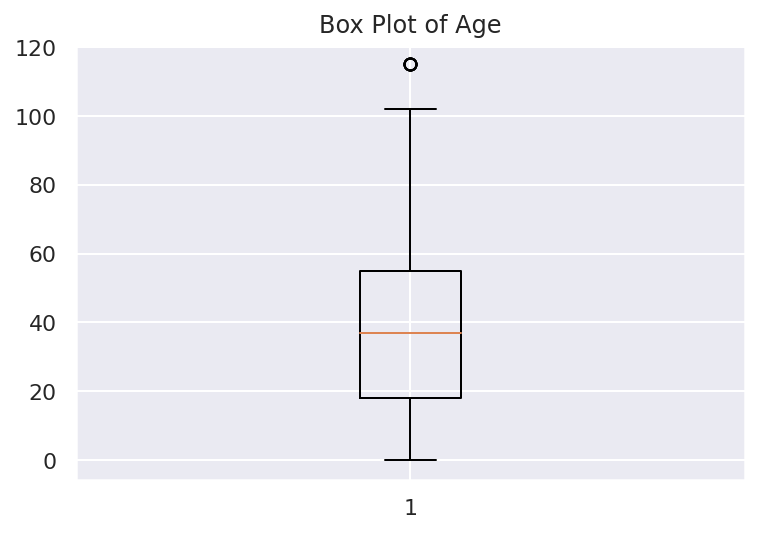

In [84]:
#dataset["Age"].value_counts().sort_index()
fig, ax = plt.subplots()
ax.set_title('Box Plot of Age')
ax.boxplot(dataset["Age"])
plt.show()

> We can notice people of different ages. It will be hard to work with these many numerical values and find insights. So, we are going to create a new column consisting of age groups.

In [85]:
# Age group created according to this: https://www.statcan.gc.ca/eng/concepts/definitions/age2
age_category = pd.cut(dataset.Age,bins=[0, 17, 24, 65, 120],labels=['Child', "Young", "Adult","Senior"])
dataset.insert(5,'AgeGroup', age_category)
dataset.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,AgeGroup,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SmsReceived,ShowedUp
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,Adult,62,JARDIM DA PENHA,0,1,0,0,0,0,Yes
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,Adult,56,JARDIM DA PENHA,0,0,0,0,0,0,Yes
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,Adult,62,MATA DA PRAIA,0,0,0,0,0,0,Yes
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,Child,8,PONTAL DE CAMBURI,0,0,0,0,0,0,Yes
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,Adult,56,JARDIM DA PENHA,0,1,1,0,0,0,Yes


In [86]:
dataset_grouped_by_age = dataset.groupby("AgeGroup")["ShowedUp"].value_counts()

print(dataset_grouped_by_age)

AgeGroup  ShowedUp
Child     Yes         18482
          No           5358
Young     Yes          7419
          No           2469
Adult     Yes         48171
          No          11787
Senior    Yes         11235
          No           2066
Name: ShowedUp, dtype: int64


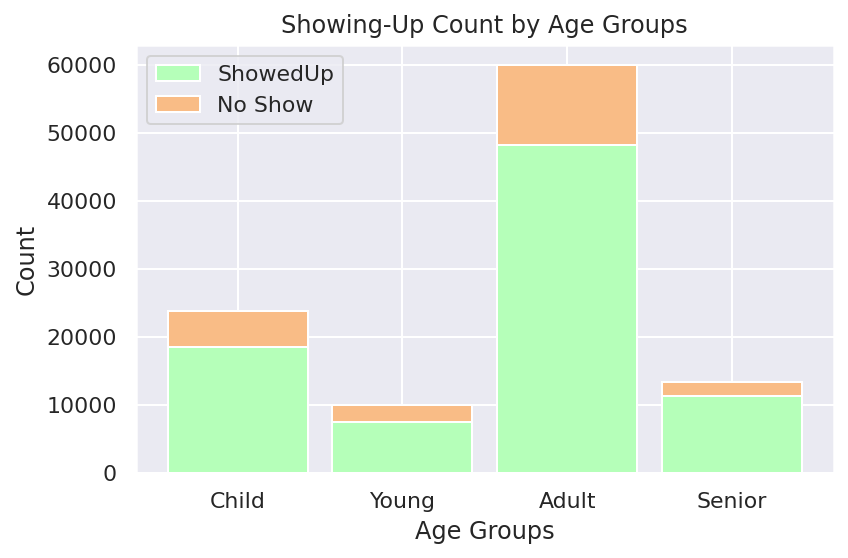

In [87]:
positions = np.arange(4)

labels=['Child', "Young", "Adult", "Senior"]
barWidth = 0.85

yes_count, no_count = [], []

for age_group in labels:
    yes_count.append(dataset_grouped_by_age[age_group]["Yes"])
    no_count.append(dataset_grouped_by_age[age_group]["No"])

fig, ax = plt.subplots()

ax.bar(positions, yes_count, color='#b5ffb9', edgecolor='white', width=barWidth, label="ShowedUp")
ax.bar(positions, no_count, bottom=yes_count, color='#f9bc86', edgecolor='white', width=barWidth, label="No Show")
 
ax.set_xticks(positions)
ax.set_xticklabels(labels)
ax.set_xlabel("Age Groups")
ax.set_ylabel("Count")
ax.set_title("Showing-Up Count by Age Groups")
ax.legend()

fig.tight_layout()

plt.show()

> Number of adult patient for appointment is higher than any other age groups. They also have higher proportion of person who didn't show up for their appointment.

#### Who recieved sms and didn't show up?

In [88]:
dataset_grouped_by_smsreceived = dataset.groupby("SmsReceived")["ShowedUp"].value_counts()
print(dataset_grouped_by_smsreceived)

SmsReceived  ShowedUp
0            Yes         62509
             No          12535
1            Yes         25698
             No           9784
Name: ShowedUp, dtype: int64


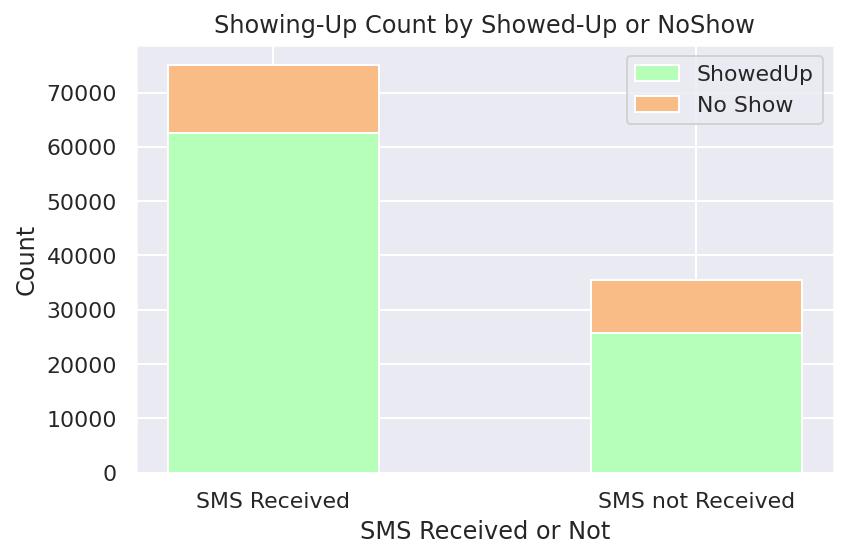

In [89]:
positions = np.arange(2)

labels=["SMS Received", "SMS not Received"]
barWidth = 0.5

yes_percentage, no_percentage = [], []

for tag in [0, 1]:
    yes_percentage.append(dataset_grouped_by_smsreceived[tag]["Yes"])
    no_percentage.append(dataset_grouped_by_smsreceived[tag]["No"])


fig, ax = plt.subplots()

ax.bar(positions, yes_percentage, color='#b5ffb9', edgecolor='white', width=barWidth, label="ShowedUp")
ax.bar(positions, no_percentage, bottom=yes_percentage, color='#f9bc86', edgecolor='white', width=barWidth, label="No Show")
 
ax.set_xticks(positions)
ax.set_xticklabels(labels)
ax.set_xlabel("SMS Received or Not")
ax.set_ylabel("Count")
ax.set_title("Showing-Up Count by Showed-Up or NoShow")
ax.legend()

fig.tight_layout()

plt.show()

>A great number of people showed up for their appointment who received smses. And even  the proportion among non-sms receiver is quite high.

>

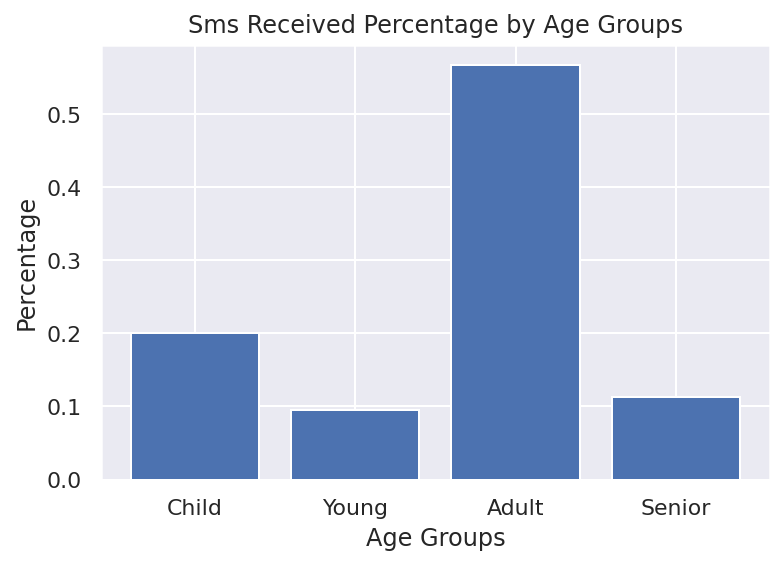

In [90]:
dataset_grouped_by_age = dataset.groupby("AgeGroup")["SmsReceived"].value_counts()

number_of_sms_received = dataset[dataset["SmsReceived"] == 1].shape[0]

child_percentage = dataset_grouped_by_age["Child"][1]/number_of_sms_received
young_percentage = dataset_grouped_by_age["Young"][1]/number_of_sms_received
adult_percentage = dataset_grouped_by_age["Adult"][1]/number_of_sms_received
senior_percentage = dataset_grouped_by_age["Senior"][1]/number_of_sms_received

age_group_percentage_list = [child_percentage, young_percentage, adult_percentage, senior_percentage]

fig, ax = plt.subplots()

ax.bar([0,1,2,3], age_group_percentage_list)
ax.set_xticks([0,1,2,3])
ax.set_xticklabels(["Child", "Young", "Adult", "Senior"])
ax.set_xlabel("Age Groups")
ax.set_ylabel("Percentage")
ax.set_title("Sms Received Percentage by Age Groups")

plt.show()

>So "Adult"s are the one age group who received most smses.

#### What are the relation between age and also other binary features?

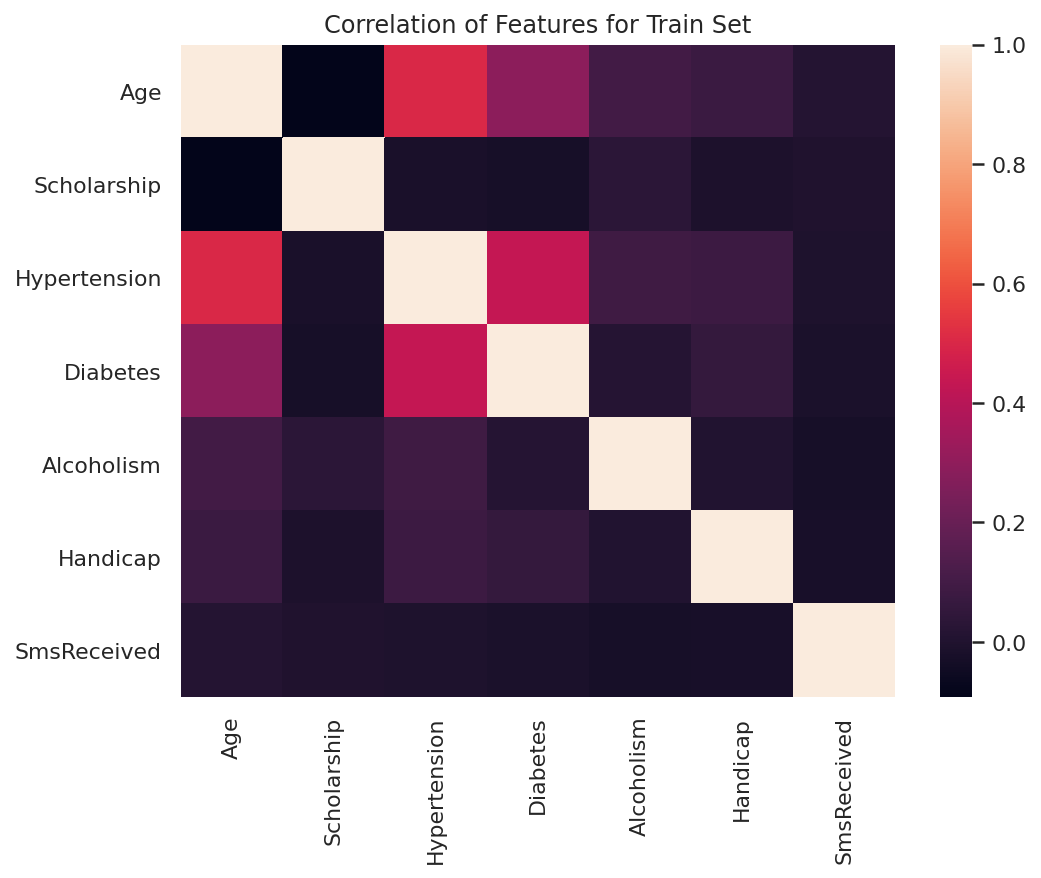

In [105]:
columns_for_heatmap = ["Age" ,"Scholarship", "Hypertension", "Diabetes", "Alcoholism", "Handicap", "SmsReceived"]

plt.figure(figsize=(8,6))
plt.title('Correlation of Features for Train Set')
sns.heatmap(dataset[columns_for_heatmap].astype(float).corr(), vmax=1.0 )
plt.show()

<a id='conclusions'></a>
## Conclusions

### Results:

- More female patients than male.
- Among all the medical applicants around 80% of them showed up for the appointments.
- After creating age groups, we can see that "Adult"s are the one who doesn't show up for the appointments more than others.
- Even adults are the one receives more smses.
- Adult patient number is higher than any other age group. The age range is also greater than others.

### Limitations:

- Found illogical relation between Appointment day and scheduled day. 
